## Import Libraries

In [382]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from sklearn.metrics import precision_recall_fscore_support as score
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [231]:
historical_data = pd.read_csv('historical_data.csv')
current_inventory_data = pd.read_csv('current_inventory_data.csv')
commission_table = pd.read_csv('commission_table.csv')

In [232]:
# combined_data_copy = pd.concat([historical_data, current_inventory_data])

In [233]:
combined_data = pd.concat([historical_data, current_inventory_data])

## Display the shape of the data

In [234]:
print('Rows and columns in historical_data are',historical_data.shape[0], ',',historical_data.shape[1])
print('Rows and columns in current_inventory_data are',current_inventory_data.shape[0], ',',current_inventory_data.shape[1])
print('Rows and columns in commission_table are',commission_table.shape[0], ',',commission_table.shape[1])
print('Rows and columns in combined_data are',combined_data.shape[0], ',',combined_data.shape[1])

Rows and columns in historical_data are 685582 , 24
Rows and columns in current_inventory_data are 25000 , 24
Rows and columns in commission_table are 138 , 3
Rows and columns in combined_data are 710582 , 24


## Display few records

In [235]:
historical_data.head()

,Unnamed: 0,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,...,date_created,date_last_seen,price_eur,sold_flag,height_of_picture,width_of_picture,aspect_ratio,no_of_pictures,test1,test2
0,362271,ford,focus,92000.0,2006.0,1596.0,85.0,coupe,blue,NaN,...,2017-02-14 17:34:38.809116+00,2017-02-14 17:34:38.809116+00,1295.34,1,?,?,?,3,2017-02-14 17:34:38.809116+00,2017-02-14 17:34:38.809116+00
1,458002,NaN,NaN,22000.0,2013.0,1560.0,85.0,NaN,NaN,None,...,2015-12-02 09:31:25.571302+00,2015-12-14 05:16:59.23886+00,14991.67,0,62,88,1.4193,6,2015-12-02 09:31:25.571302+00,2015-12-14 05:16:59.23886+00
2,609404,volkswagen,polo,29680.0,2013.0,1197.0,66.0,other,NaN,NaN,...,2016-02-26 10:59:10.921811+00,2016-07-03 19:25:35.777411+00,12460.00,0,?,?,?,4,2016-02-26 10:59:10.921811+00,2016-07-03 19:25:35.777411+00
3,330169,skoda,NaN,22100.0,2015.0,1598.0,66.0,other,NaN,2018,...,2016-03-05 11:12:58.5208+00,2011-07-03 17:38:05.783742+00,14590.00,1,30,100,3.3333,5,2016-03-05 11:12:58.5208+00,2016-07-03 17:38:05.783742+00
4,111047,ford,transit,57690.0,2010.0,2198.0,63.0,NaN,NaN,None,...,2015-12-18 14:46:32.397086+00,2016-02-16 15:00:04.57898+00,10046.08,0,23,26,1.1304,7,2015-12-18 14:46:32.397086+00,2016-02-16 15:00:04.57898+00


In [236]:
current_inventory_data.head()

,Unnamed: 0,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,...,date_created,date_last_seen,price_eur,sold_flag,height_of_picture,width_of_picture,aspect_ratio,no_of_pictures,test1,test2
0,9040,volkswagen,sharan,194000.0,1900.0,1896.0,85.0,van,blue,NaN,...,2016-12-29 16:02:25.656542+00,2017-02-09 02:10:59.686135+00,1295.34,0,24,120,5,5,2016-12-29 16:02:25.656542+00,2017-02-09 02:10:59.686135+00
1,339499,audi,200,NaN,2007.0,8400.0,NaN,other,NaN,NaN,...,2016-02-12 10:45:29.950636+00,2016-07-03 18:19:20.659466+00,12176.17,0,?,?,?,2,2016-02-12 10:45:29.950636+00,2016-07-03 18:19:20.659466+00
2,408516,skoda,octavia,0.0,2005.0,NaN,55.0,other,NaN,NaN,...,2016-12-05 17:41:06.32795+00,2016-12-18 07:55:35.445992+00,1295.34,1,38,198,5.2105,4,2016-12-05 17:41:06.32795+00,2016-12-18 07:55:35.445992+00
3,193240,mercedes-benz,NaN,6990.0,2014.0,1595.0,90.0,nan,NaN,2017,...,2016-01-26 01:58:34.274634+00,2016-02-11 07:51:10.138757+00,26880.00,0,?,?,?,3,2016-01-26 01:58:34.274634+00,2016-02-11 07:51:10.138757+00
4,409936,volkswagen,golf-sportsvan,0.0,2015.0,1395.0,92.0,other,NaN,NaN,...,2016-03-04 11:30:51.295258+00,2016-07-03 17:33:07.548746+00,26532.27,0,60,468,7.8,3,2016-03-04 11:30:51.295258+00,2016-07-03 17:33:07.548746+00


In [237]:
commission_table.head()

,Maker,Year,Commission
0,ford,2015,0.14
1,skoda,2015,0.02
2,bmw,2015,0.14
3,suzuki,2015,0.02
4,nissan,2015,0.06


## Describe the data

In [238]:
historical_data.describe() ## Lets look into numeric values alone first

,Unnamed: 0,mileage,manufacture_year,engine_displacement,engine_power,price_eur,sold_flag,no_of_pictures
count,685582.000000,6.156380e+05,618004.000000,542123.000000,578455.000000,6.855820e+05,685582.000000,685582.000000
mean,355351.399666,1.157356e+05,1990.613444,2044.020888,98.498028,4.344587e+06,0.198307,4.000106
std,205158.965137,3.406349e+05,90.254330,1966.525136,48.940934,3.252856e+09,0.398725,1.999587
min,0.000000,0.000000e+00,0.000000,10.000000,1.000000,4.000000e-02,0.000000,1.000000
25%,177637.250000,1.875900e+04,2003.000000,1400.000000,68.000000,1.295340e+03,0.000000,2.000000
50%,355376.500000,8.630850e+04,2009.000000,1798.000000,86.000000,7.309400e+03,0.000000,4.000000
75%,533055.750000,1.580705e+05,2013.000000,1997.000000,110.000000,1.629482e+04,0.000000,6.000000
max,710581.000000,9.999999e+06,2017.000000,32000.000000,999.000000,2.679450e+12,1.000000,7.000000


###### Once thing we notice is that mean and median are not in the same range which means that data might have outliers

In [239]:
current_inventory_data.describe()

,Unnamed: 0,mileage,manufacture_year,engine_displacement,engine_power,price_eur,sold_flag,no_of_pictures
count,25000.000000,2.247300e+04,22508.000000,19695.000000,21022.000000,2.500000e+04,25000.000000,25000.000000
mean,353620.431400,1.143223e+05,1991.681758,2046.358264,98.821520,1.270660e+04,0.195200,4.011600
std,204259.710398,3.240323e+05,85.509947,1946.857557,49.515002,1.391690e+05,0.396363,1.998686
min,8.000000,0.000000e+00,0.000000,12.000000,6.000000,4.000000e-02,0.000000,1.000000
25%,177852.750000,1.890000e+04,2003.000000,1400.000000,68.000000,1.332350e+03,0.000000,2.000000
50%,352842.500000,8.800000e+04,2009.000000,1798.000000,87.000000,7.450000e+03,0.000000,4.000000
75%,530078.750000,1.582250e+05,2013.000000,1997.000000,110.000000,1.646839e+04,0.000000,6.000000
max,710552.000000,9.999999e+06,2017.000000,32000.000000,923.000000,2.178750e+07,1.000000,7.000000


###### Both current inventory data and historical data are distributed in the same range

In [240]:
commission_table.describe()

,Year,Commission
count,138.000000,138.000000
mean,2016.000000,0.082101
std,0.819471,0.039807
min,2015.000000,0.020000
25%,2015.000000,0.050000
50%,2016.000000,0.080000
75%,2017.000000,0.117500
max,2017.000000,0.150000


## Check for nulls

In [241]:
historical_data.isnull().sum()

Unnamed: 0                  0
maker                   99892
model                  218878
mileage                 69944
manufacture_year        67578
engine_displacement    143459
engine_power           107127
body_type              154511
color_slug             645305
stk_year               330100
transmission           143143
door_count             119083
seat_count             145103
fuel_type              357060
date_created                0
date_last_seen              0
price_eur                   0
sold_flag                   0
height_of_picture           0
width_of_picture            0
aspect_ratio                0
no_of_pictures              0
test1                       0
test2                       0
dtype: int64

In [242]:
current_inventory_data.isnull().sum()

Unnamed: 0                 0
maker                   3598
model                   8029
mileage                 2527
manufacture_year        2492
engine_displacement     5305
engine_power            3978
body_type               5763
color_slug             23517
stk_year               11921
transmission            5228
door_count              4258
seat_count              5272
fuel_type              12921
date_created               0
date_last_seen             0
price_eur                  0
sold_flag                  0
height_of_picture          0
width_of_picture           0
aspect_ratio               0
no_of_pictures             0
test1                      0
test2                      0
dtype: int64

In [243]:
combined_data.isnull().sum()

Unnamed: 0                  0
maker                  103490
model                  226907
mileage                 72471
manufacture_year        70070
engine_displacement    148764
engine_power           111105
body_type              160274
color_slug             668822
stk_year               342021
transmission           148371
door_count             123341
seat_count             150375
fuel_type              369981
date_created                0
date_last_seen              0
price_eur                   0
sold_flag                   0
height_of_picture           0
width_of_picture            0
aspect_ratio                0
no_of_pictures              0
test1                       0
test2                       0
dtype: int64

## Missing value treatment

In [244]:
def update_missing_values_maker_wise(column, value):
    print(column)
    if value == 0:
        print('number')
        for i in combined_data['maker'].unique():
            if str(combined_data[combined_data['maker'] == i][column].median()) == 'nan':
                combined_data.loc[combined_data['maker'] == i,column] = combined_data[combined_data['maker'] == i][column].fillna(combined_data[column].median())
            else:
                combined_data.loc[combined_data['maker'] == i,column] = combined_data[combined_data['maker'] == i][column].fillna(combined_data[combined_data['maker'] == i][column].median())
    else:
        print('string')
        for i in combined_data['maker'].unique():
            combined_data.loc[combined_data['maker'] == i,column] = combined_data[combined_data['maker'] == i][column].fillna(combined_data[combined_data['maker'] == i][column].value_counts().index[0])
    

In [245]:
combined_data = pd.concat([historical_data, current_inventory_data])

In [246]:
combined_data['body_type'] = combined_data['body_type'].str.strip()
combined_data['height_of_picture'] = combined_data['height_of_picture'].str.strip()
combined_data['width_of_picture'] = combined_data['width_of_picture'].str.strip()
combined_data['aspect_ratio'] = combined_data['aspect_ratio'].str.strip()
combined_data = combined_data.replace({'None': np.nan, '?' : np.nan})


In [247]:
combined_data['maker'].fillna('Unknown maker', inplace = True)
combined_data['model'].fillna('Unknown model', inplace = True)
combined_data['manufacture_year'].fillna(0, inplace = True) # 0 means unknown year
combined_data['body_type'].fillna('other', inplace = True)
combined_data['height_of_picture'].fillna(combined_data['height_of_picture'].median(), inplace = True)
combined_data['width_of_picture'].fillna(combined_data['width_of_picture'].median(), inplace = True)
combined_data['aspect_ratio'].fillna(combined_data['aspect_ratio'].median(), inplace = True)
combined_data.drop('color_slug', axis = 1, inplace = True)
combined_data.drop('stk_year', axis = 1, inplace = True)
combined_data.drop('Unnamed: 0', axis = 1, inplace = True)

update_missing_values_maker_wise('mileage',  0)
update_missing_values_maker_wise('engine_displacement', 0)
update_missing_values_maker_wise('engine_power', 0)
update_missing_values_maker_wise('transmission', 1)
update_missing_values_maker_wise('door_count', 1)
update_missing_values_maker_wise('seat_count', 1)
update_missing_values_maker_wise('fuel_type', 1)

combined_data['height_of_picture'] = combined_data['height_of_picture'].astype(float)
combined_data['width_of_picture'] = combined_data['width_of_picture'].astype(float)
combined_data['aspect_ratio'] = combined_data['aspect_ratio'].astype(float)
combined_data['door_count'] = combined_data['door_count'].astype(int)
combined_data['seat_count'] = combined_data['seat_count'].astype(int)

mileage
number
engine_displacement
number
engine_power
number
transmission
string
door_count
string
seat_count
string
fuel_type
string


In [248]:
combined_data_copy = combined_data.copy()

## Outlier

<AxesSubplot:xlabel='aspect_ratio', ylabel='Density'>

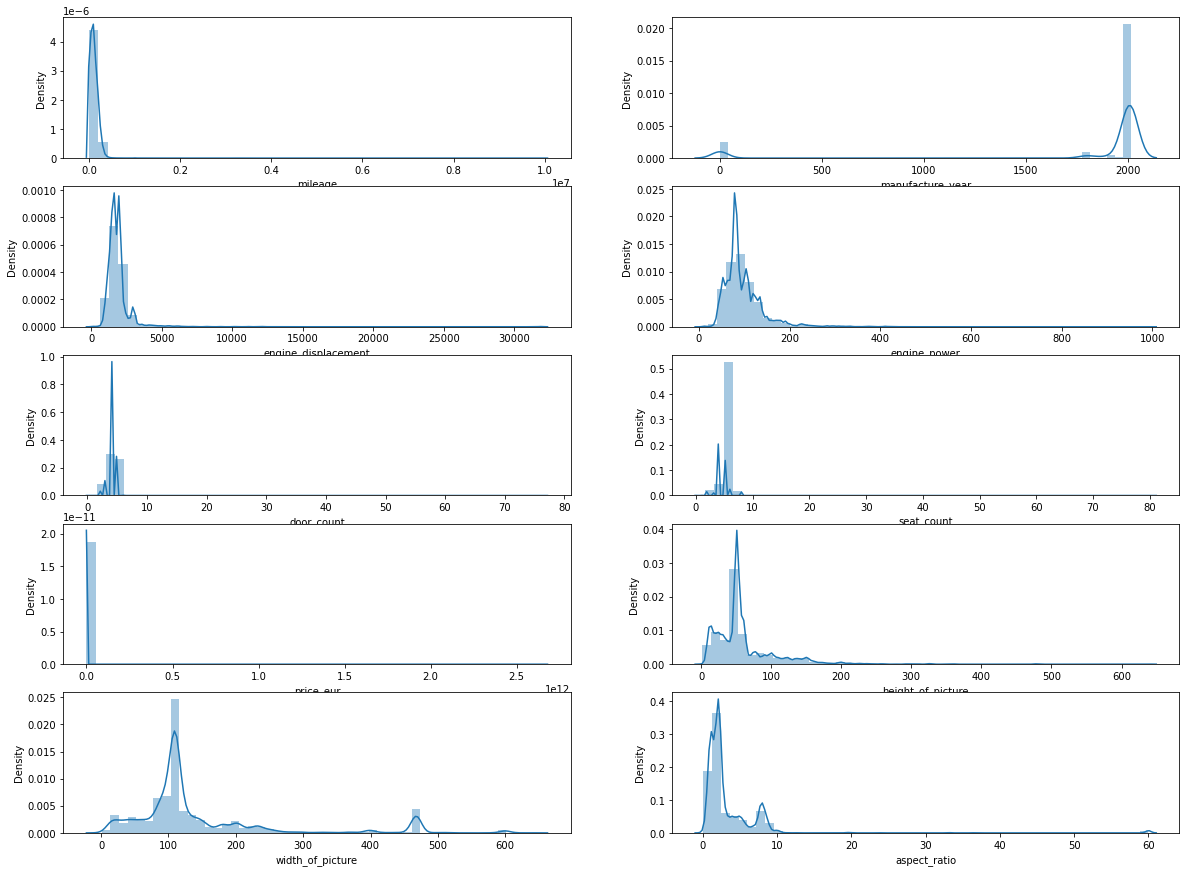

In [249]:
fig, a = plt.subplots(5,2,figsize=(20,15))
sns.distplot(combined_data['mileage'] , ax=a[0,0])
sns.distplot(combined_data['manufacture_year'] , ax=a[0,1])
sns.distplot(combined_data['engine_displacement'] , ax=a[1,0])
sns.distplot(combined_data['engine_power'] , ax=a[1,1])
sns.distplot(combined_data['door_count'] , ax=a[2,0])
sns.distplot(combined_data['seat_count'] , ax=a[2,1])
sns.distplot(combined_data['price_eur'] , ax=a[3,0])
sns.distplot(combined_data['height_of_picture'] , ax=a[3,1])
sns.distplot(combined_data['width_of_picture'] , ax=a[4,0])
sns.distplot(combined_data['aspect_ratio'] , ax=a[4,1])

In [250]:
combined_data['z score'] = scipy.stats.zscore(combined_data['mileage'])
combined_data.loc[combined_data['z score'] >= 3, 'mileage'] = np.nan
update_missing_values_maker_wise('mileage',  0)
combined_data.loc[(combined_data['manufacture_year'] != 0) & (combined_data['manufacture_year'] < 1800), 'manufacture_year'] = np.nan
combined_data['manufacture_year'].fillna(0, inplace = True) 
combined_data['z score'] = scipy.stats.zscore(combined_data['engine_displacement'])
combined_data.loc[combined_data['z score'] >= 3, 'engine_displacement'] = np.nan
update_missing_values_maker_wise('engine_displacement',  0)
combined_data['z score'] = scipy.stats.zscore(combined_data['engine_power'])
combined_data.loc[combined_data['z score'] >= 3, 'engine_power'] = np.nan
update_missing_values_maker_wise('engine_power',  0)
combined_data.loc[combined_data['door_count'].astype(int) > 7, 'door_count'] = 4
combined_data.loc[combined_data['seat_count'].astype(int) > 10, 'seat_count'] = 5

combined_data['z score'] = scipy.stats.zscore(combined_data['price_eur'])
combined_data.loc[combined_data['z score'] >= 3, 'price_eur'] = np.nan
update_missing_values_maker_wise('price_eur',  0)

combined_data['z score'] = scipy.stats.zscore(combined_data['height_of_picture'].astype(float))
combined_data.loc[combined_data['z score'] >= 3, 'height_of_picture'] = np.nan

combined_data['z score'] = scipy.stats.zscore(combined_data['aspect_ratio'].astype(float))
combined_data.loc[combined_data['z score'] >= 3, 'aspect_ratio'] = np.nan

combined_data['z score'] = scipy.stats.zscore(combined_data['width_of_picture'].astype(float))
combined_data.loc[combined_data['z score'] >= 3, 'width_of_picture'] = np.nan

combined_data['height_of_picture'].fillna(combined_data['height_of_picture'].median(), inplace = True)
combined_data['width_of_picture'].fillna(combined_data['width_of_picture'].median(), inplace = True)
combined_data['aspect_ratio'].fillna(combined_data['aspect_ratio'].median(), inplace = True)



mileage
number
engine_displacement
number
engine_power
number
price_eur
number


<AxesSubplot:xlabel='aspect_ratio', ylabel='Density'>

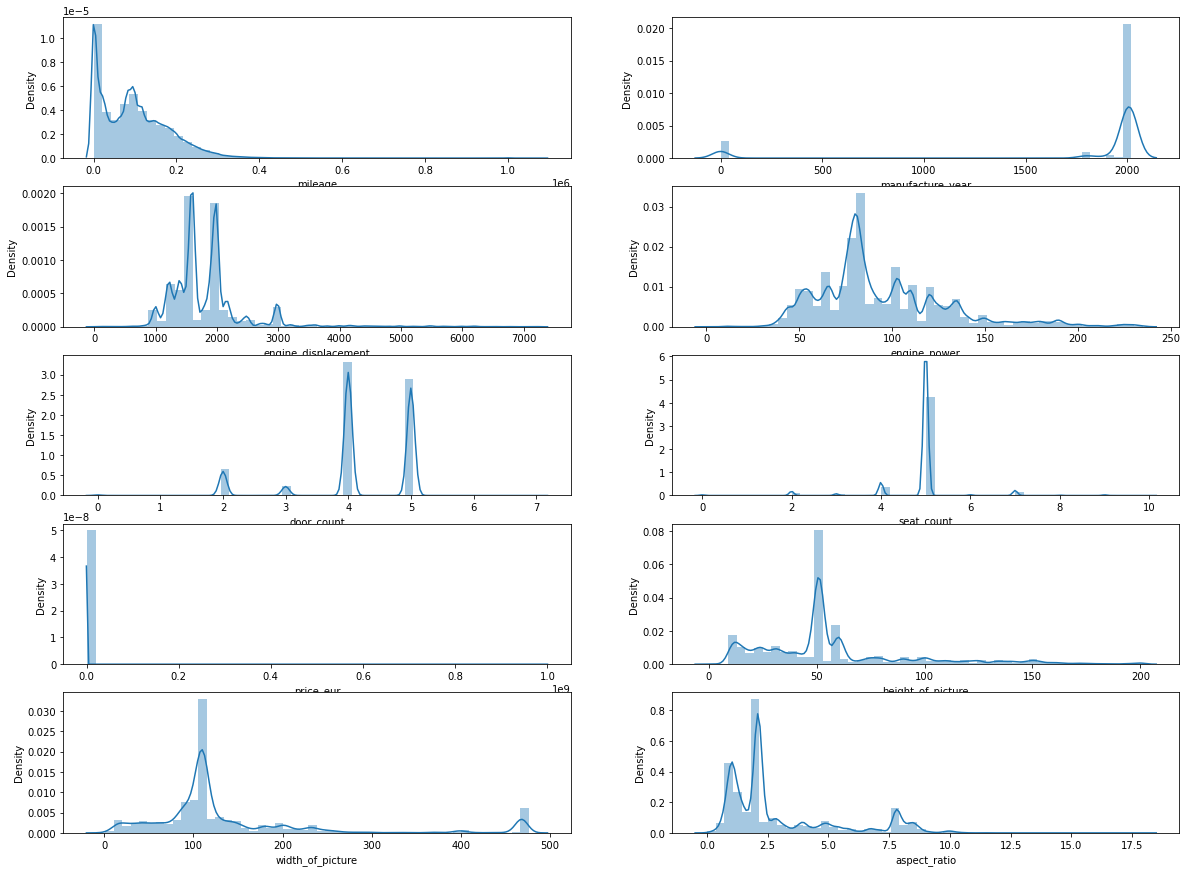

In [251]:
fig, a = plt.subplots(5,2,figsize=(20,15))
sns.distplot(combined_data['mileage'] , ax=a[0,0])
sns.distplot(combined_data['manufacture_year'] , ax=a[0,1])
sns.distplot(combined_data['engine_displacement'] , ax=a[1,0])
sns.distplot(combined_data['engine_power'] , ax=a[1,1])
sns.distplot(combined_data['door_count'] , ax=a[2,0])
sns.distplot(combined_data['seat_count'] , ax=a[2,1])
sns.distplot(combined_data['price_eur'] , ax=a[3,0])
sns.distplot(combined_data['height_of_picture'] , ax=a[3,1])
sns.distplot(combined_data['width_of_picture'] , ax=a[4,0])
sns.distplot(combined_data['aspect_ratio'] , ax=a[4,1])

## EDA

In [252]:
def get_sold_perc(column):
    df = combined_data[column].value_counts().to_frame()
    df = pd.merge(df, combined_data[combined_data['sold_flag'] == 1][column].value_counts().to_frame(), left_index = True, right_index = True)
    df = pd.merge(df, combined_data[combined_data['sold_flag'] == 0][column].value_counts().to_frame(), left_index = True, right_index = True)
    df.columns = ['Total', 'Sold', 'Not sold']
    df['% Sold'] = df['Sold'] / df['Total']
    return df.sort_values(by = '% Sold', ascending = False)

In [253]:
get_sold_perc('maker')

,Total,Sold,Not sold,% Sold
tesla,39,10,29,0.256410
hummer,148,32,116,0.216216
maserati,385,83,302,0.215584
bentley,240,50,190,0.208333
mazda,9105,1873,7232,0.205711
rover,4126,836,3290,0.202618
honda,5366,1083,4283,0.201826
chevrolet,4141,833,3308,0.201159
mitsubishi,5678,1138,4540,0.200423
ford,48078,9635,38443,0.200404


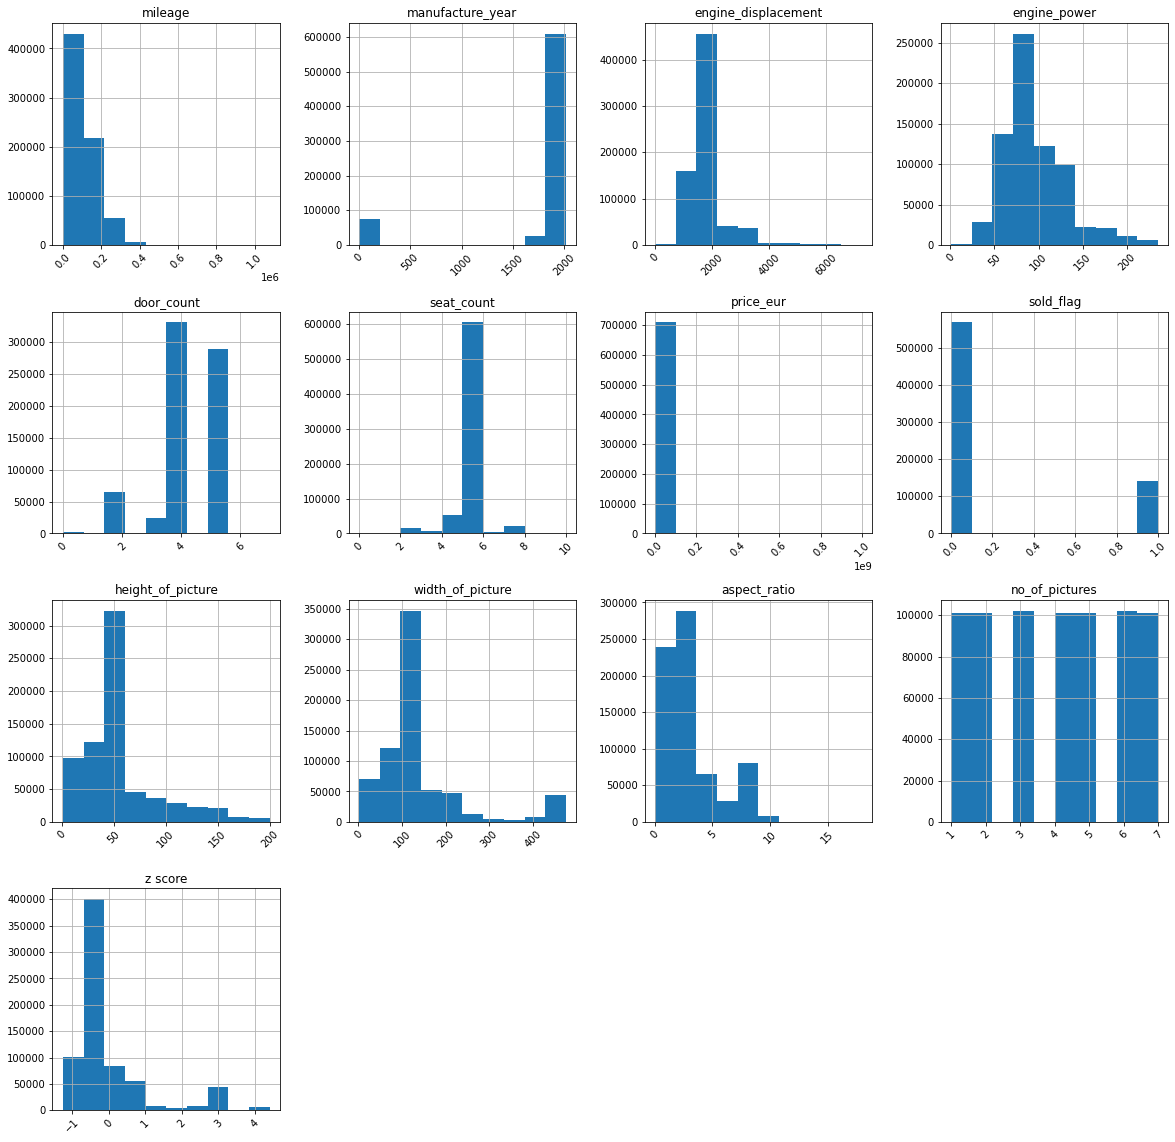

In [254]:
combined_data.hist(figsize=(20,20), xrot=45)
plt.show()

In [255]:
combined_data.describe(include='object')

,maker,model,body_type,transmission,fuel_type,date_created,date_last_seen,test1,test2
count,710582,710582,710582,710582,710582,710582,710582,710582,710582
unique,47,937,12,2,5,710582,671143,710582,671141
top,Unknown maker,Unknown model,other,man,gasoline,2016-03-09 17:02:02.295928+00,2016-01-27 20:40:15.46361+00,2016-03-09 17:02:02.295928+00,2016-01-27 20:40:15.46361+00
freq,103490,226907,553345,535057,379856,1,34190,1,39442


In [256]:
# num_cols = ['price_eur','door_count', 'seat_count', 'engine_power']
# for col in num_cols:
#     sns.boxplot(y = combined_data['sold_flag'].astype('category'), x = col, data=combined_data)
#     plt.show()

In [257]:
for col in combined_data.select_dtypes(include='object'):
    if combined_data[col].nunique() <=30:
        display(pd.crosstab(combined_data['sold_flag'], combined_data[col], normalize='index'))
        #display(pd.crosstab(data['target'], data[col]))

body_type,COMPACT,com_pact,compact,convertible,coupe,nan,offroad,other,sedan,stationwagon,transporter,van
sold_flag,,,,,,,,,,,,
0,0.002213,0.002227,0.063465,0.001520,0.019956,0.090393,0.006408,0.778396,0.005524,0.019895,0.001262,0.008741
1,0.002173,0.002443,0.063826,0.001498,0.020123,0.088649,0.006511,0.780035,0.005091,0.019484,0.001328,0.008840


transmission,auto,man
sold_flag,,
0,0.246935,0.753065
1,0.247344,0.752656


fuel_type,cng,diesel,electric,gasoline,lpg
sold_flag,,,,,
0,0.000309,0.456019,0.007430,0.534210,0.002032
1,0.000284,0.453833,0.007626,0.536028,0.002230


In [258]:
for col in combined_data.select_dtypes(include='object'):
    if combined_data[col].nunique() <= 30:
        display(combined_data.groupby(col)[['mileage', 'engine_displacement', 'engine_power', 'price_eur']].mean())


,mileage,engine_displacement,engine_power,price_eur
body_type,,,,
COMPACT,109376.067007,1847.751117,85.539247,4230.519375
com_pact,111013.956603,1857.267204,86.760074,231675.302201
compact,110220.154569,1861.723819,85.214605,33826.526579
convertible,84393.254410,2177.168059,117.106778,18983.311718
coupe,103321.189559,1598.988102,79.356378,3204.450546
nan,88363.162559,1831.348131,96.917966,16047.563271
offroad,96692.132334,2299.714536,126.065455,1295.340000
other,95421.182570,1832.658519,94.361962,15277.895355
sedan,139277.918349,2180.148939,114.737060,1301.594472


,mileage,engine_displacement,engine_power,price_eur
transmission,,,,
auto,90053.775180,2266.812719,124.855229,22067.289322
man,99923.884129,1692.951300,83.813870,14311.201081


,mileage,engine_displacement,engine_power,price_eur
fuel_type,,,,
cng,108370.425926,1606.180556,81.388889,1295.340000
diesel,104281.505764,1982.340040,104.413562,14868.657034
electric,135235.123893,1866.685698,89.027888,1295.340000
gasoline,91029.535802,1708.542462,85.126730,17659.753068
lpg,131311.311481,1840.544158,90.050951,1295.340000


1. mileage drops in gasoline fuel type but price for gasoline is more
2. engine power is more in diesel fuel type. 
3. for manual transmission the mileage is more but the power and price is less compared to auto
4. price for com_pact body pain is exceedingly high

In [259]:
corr = combined_data.corr()
corr

,mileage,manufacture_year,engine_displacement,engine_power,door_count,seat_count,price_eur,sold_flag,height_of_picture,width_of_picture,aspect_ratio,no_of_pictures,z score
mileage,1.000000,0.147551,0.155888,0.008689,0.055267,0.038352,-0.004100,-0.000850,-0.000033,0.001369,0.000072,-0.000396,0.001123
manufacture_year,0.147551,1.000000,0.034770,0.007103,-0.070015,-0.026662,-0.003787,0.001207,-0.000200,0.001156,0.001252,-0.000315,0.001795
engine_displacement,0.155888,0.034770,1.000000,0.608010,-0.058881,0.019486,0.002499,-0.001993,0.000139,0.000602,0.000472,0.002719,0.000882
engine_power,0.008689,0.007103,0.608010,1.000000,-0.069398,0.040063,0.003079,-0.000669,0.001430,0.001122,-0.000325,0.000205,0.000568
door_count,0.055267,-0.070015,-0.058881,-0.069398,1.000000,0.366505,-0.002414,-0.000767,0.001135,0.001108,0.000278,-0.001429,0.000154
seat_count,0.038352,-0.026662,0.019486,0.040063,0.366505,1.000000,-0.000283,-0.001050,-0.000372,-0.000088,0.000105,-0.002138,0.000116
price_eur,-0.004100,-0.003787,0.002499,0.003079,-0.002414,-0.000283,1.000000,-0.000371,0.000747,-0.000769,-0.001176,0.000137,-0.000862
sold_flag,-0.000850,0.001207,-0.001993,-0.000669,-0.000767,-0.001050,-0.000371,1.000000,0.001160,0.000990,0.000218,-0.001335,0.000805
height_of_picture,-0.000033,-0.000200,0.000139,0.001430,0.001135,-0.000372,0.000747,0.001160,1.000000,0.224692,-0.398470,-0.001533,0.183503
width_of_picture,0.001369,0.001156,0.000602,0.001122,0.001108,-0.000088,-0.000769,0.000990,0.224692,1.000000,0.569269,-0.000889,0.908279


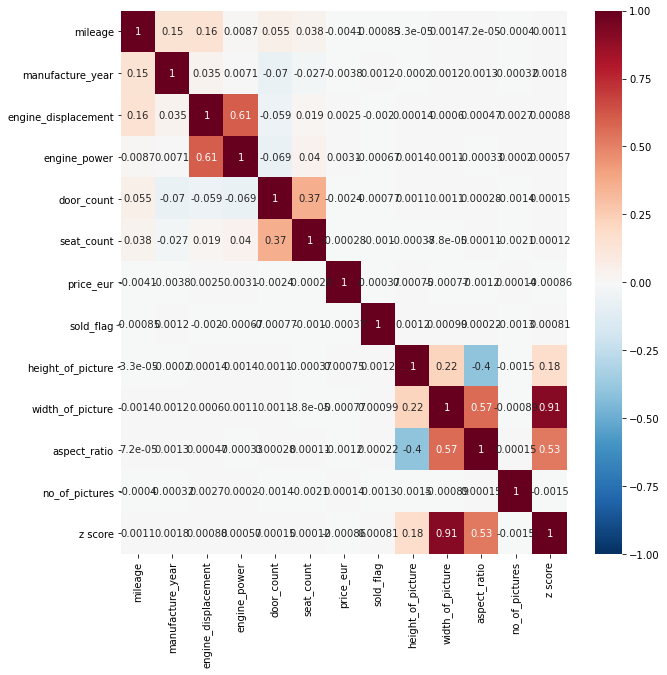

In [260]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

## Encoding

In [261]:
maker = LabelEncoder()
combined_data['maker'] = maker.fit_transform(combined_data['maker']) 
model = LabelEncoder()
combined_data['model'] = model.fit_transform(combined_data['model']) 
body_type = LabelEncoder()
combined_data['body_type'] = body_type.fit_transform(combined_data['body_type']) 
transmission = LabelEncoder()
combined_data['transmission'] = transmission.fit_transform(combined_data['transmission']) 
fuel_type = LabelEncoder()
combined_data['fuel_type'] = fuel_type.fit_transform(combined_data['fuel_type']) 

In [262]:
combined_data.head().T

,0,1,2,3,4
maker,12,0,45,39,12
model,421,166,659,166,853
mileage,92000.0,22000.0,29680.0,22100.0,57690.0
manufacture_year,2006.0,2013.0,2013.0,2015.0,2010.0
engine_displacement,1596.0,1560.0,1197.0,1598.0,2198.0
engine_power,85.0,85.0,66.0,66.0,63.0
body_type,4,7,7,7,7
transmission,1,1,1,0,1
door_count,5,4,5,5,4
seat_count,5,5,5,5,3


## Split data

In [500]:
X = combined_data.drop(['date_created', 'date_last_seen', 'test1', 'test2', 'z score', 'sold_flag'], axis = 1)
y = combined_data['sold_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_test_dataset = X_test.copy()

## Scaling

In [501]:
scaler = StandardScaler().fit(X_train)

In [502]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [499]:
# column_dict = {}
# for i, col in enumerate(X_test.columns):
#     column_dict[col] = "X_test[:, " + str(i) + "]"
# column_dict = str(column_dict).replace(": '", ': ').replace("]'", ']')
# column_dict
# X_test_dataset = pd.DataFrame({'maker': X_test[:, 0], 'model': X_test[:, 1], 'mileage': X_test[:, 2], 'manufacture_year': X_test[:, 3], 'engine_displacement': X_test[:, 4], 'engine_power': X_test[:, 5], 'body_type': X_test[:, 6], 'transmission': X_test[:, 7], 'door_count': X_test[:, 8], 'seat_count': X_test[:, 9], 'fuel_type': X_test[:, 10], 'price_eur': X_test[:, 11], 'height_of_picture': X_test[:, 12], 'width_of_picture': X_test[:, 13], 'aspect_ratio': X_test[:, 14], 'no_of_pictures': X_test[:, 15]})

## Get feature importance

In [504]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Feature: maker Score: 0.042556
Feature: model Score: 0.063702
Feature: mileage Score: 0.157453
Feature: manufacture_year Score: 0.074107
Feature: engine_displacement Score: 0.069233
Feature: engine_power Score: 0.081849
Feature: body_type Score: 0.025525
Feature: transmission Score: 0.011862
Feature: door_count Score: 0.022958
Feature: seat_count Score: 0.014647
Feature: fuel_type Score: 0.013531
Feature: price_eur Score: 0.164063
Feature: height_of_picture Score: 0.060423
Feature: width_of_picture Score: 0.062726
Feature: aspect_ratio Score: 0.068123
Feature: no_of_pictures Score: 0.06724


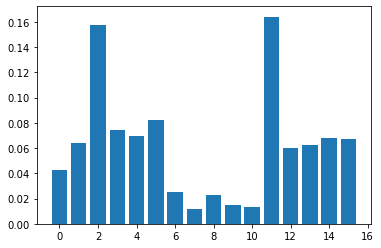

In [505]:
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature:', X.columns[i], 'Score:', round(v, 6))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## To categorical

In [294]:
y_train_c = to_categorical(y_train, num_classes=2)
y_test_c = to_categorical(y_test, num_classes=2)

print("Shape of y_train:", y_train_c.shape)
print("One value of y_train:", y_train_c[0])

Shape of y_train: (532936, 2)
One value of y_train: [1. 0.]


## Upsampling

In [40]:
!pip install sklearn

In [315]:
from imblearn.over_sampling import SMOTE

In [316]:
def upsample_SMOTE(X_train, y_train, ratio=1.0):
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [317]:
X_train_sm, y_train_sm = upsample_SMOTE(X_train, y_train)

855096 855096


In [318]:
X_train_sm_c, y_train_sm_c = upsample_SMOTE(X_train, y_train_c)

855096 855096


In [325]:
y_train_sm_c = to_categorical(y_train_sm_c, num_classes=2)

## Logistic Regression

In [44]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

sold_prob = []
for x,y in y_pred_prob:
    sold_prob.append(y)
    
output = X_test.copy()
# output['probability'] = sold_prob
# output['Actual output'] = y_test
# output['Pred output'] = y_pred

In [45]:
confusion_matrix(y_test, y_pred)

array([[142487,      0],
       [ 35159,      0]], dtype=int64)

<AxesSubplot:>

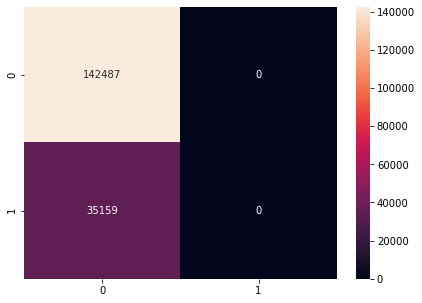

In [46]:
cm=confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["0","1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [47]:
lr.score(X_test, y_test)

0.8020839197054817

In [48]:
lr= LogisticRegression()
lr.fit(X_train_sm, y_train_sm)
print('trained')
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

sold_prob = []
for x,y in y_pred_prob:
    sold_prob.append(y)
    
output = X_test.copy()
# output['probability'] = sold_prob.astype(float)
# output['Actual output'] = y_test
# output['Pred output'] = y_pred

trained


In [49]:
confusion_matrix(y_test, y_pred)

array([[67891, 74596],
       [16721, 18438]], dtype=int64)

<AxesSubplot:>

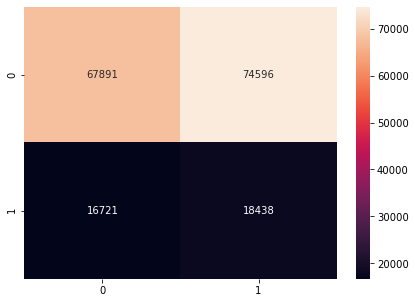

In [50]:
cm=confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["0","1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [51]:
lr.score(X_test, y_test)

0.485960843475226

## Hyper parameter tuning

In [212]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [216]:
gs = GridSearchCV(lr,param_grid,cv=10)
gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [217]:
gs.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [218]:
gs.cv_results_['mean_test_score']

array([0.50283786, 0.50283786, 0.50283786, 0.50283786, 0.50283786,
       0.50283786, 0.50283786, 0.50283669, 0.50283669, 0.50283786,
       0.50283786, 0.50283552, 0.50282264, 0.50282615, 0.50282264])

In [219]:
y_pred_gs = gs.predict(X_test)

<AxesSubplot:>

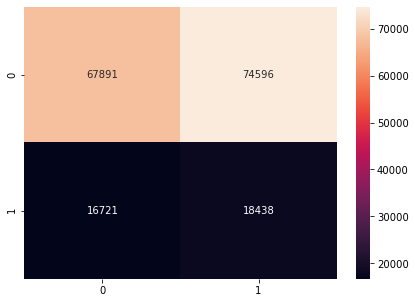

In [220]:
cm=confusion_matrix(y_test, y_pred_gs,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["0","1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, y_train)

In [ ]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

## Random forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12, verbose = 2)
rfcl = rfcl.fit(X_train_sm, y_train_sm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 14.2min finished


In [72]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.7824718822827421


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.5s finished


In [73]:
confusion_matrix(y_test, y_predict)

array([[137843,   4644],
       [ 33999,   1160]], dtype=int64)

<AxesSubplot:>

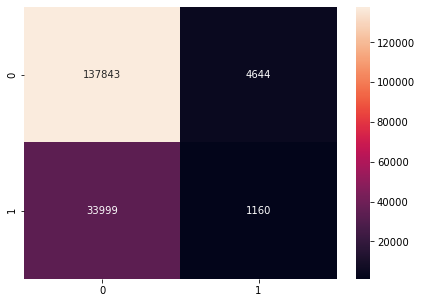

In [74]:
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["0","1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Questions

#### 1.	Which body type has the highest demand in different seasons (Summer, Winter, rainy, autumn)?

We assume the below
1. Winter (Dec to Feb)
2. Summer (Mar to May)
3. Rainy (Jun to Sep)
4. Autumn (Oct to Nov)

###### We are not able to change it to datetime since there are wrong dates (eg: 2011-02-29 12:15:14 - leap year in 2011 is not correct)

In [76]:
def get_month(s):
#     return datetime.strptime(s.split('.')[0], '%Y-%m-%d %H:%M:%S').month
    return int(s.split('-')[1])

combined_data['date_last_seen_month'] = combined_data['date_last_seen'].apply(get_month)

bins = [0, 2, 5, 9, 11, 12]
labels = ['winter','summer', 'rainy', 'autumn', 'winter']
combined_data['season'] = pd.cut(combined_data['date_last_seen_month'], bins, labels=labels, ordered = False)
# combined_data['body_type'] = combined_data['body_type'].str.strip() # removing white spaces

##### we need to consider only when it is sold to understand the demand and ignore body type = other and null values

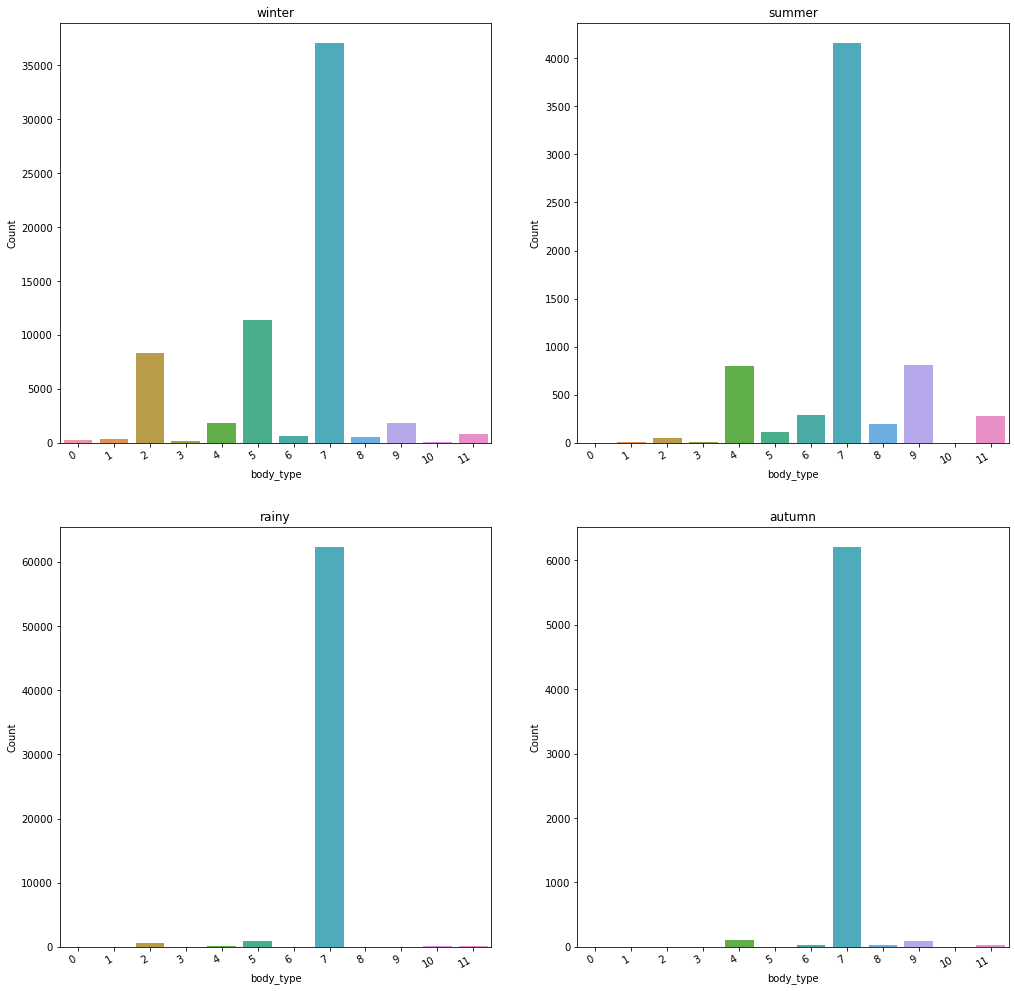

In [77]:
body_type_df = combined_data[combined_data['sold_flag'] == 1].groupby(['season', 'body_type'])['sold_flag'].count().to_frame().reset_index()
body_type_df = body_type_df.sort_values(by = 'sold_flag', ascending = False)
body_type_df_modified = body_type_df[(body_type_df['body_type'] != 'other') & (body_type_df['body_type'] != 'nan')]

plt.figure(figsize=(17, 17))
seasons = ['winter', 'summer', 'rainy', 'autumn']
for i in range(1, 5):
    plt.subplot(2, 2, i)
    sns.barplot(x = 'body_type', y = 'sold_flag', data = body_type_df_modified[body_type_df_modified['season']== seasons[i-1]])
    plt.xlabel('body_type')
    plt.ylabel('Count')
    plt.title(seasons[i-1])
    plt.xticks(rotation=30, ha='right')

##### From the above charts we are able to identify which body type has the highest demand for each seasons after ignoring when the body type ie null/other
1. For Winter and Rainy, compact body type is of highest demand
2. For Summer and Autumn, stationwagen and coupe body types are more in demand

### 2.	In the current inventory, how many cars are highly overpriced? Create your own criteria and explain your approach.

<AxesSubplot:xlabel='price_eur', ylabel='Density'>

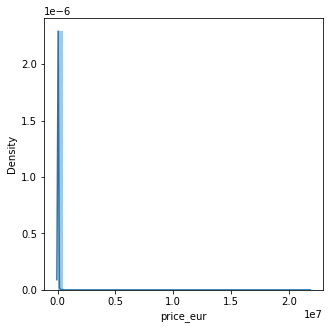

In [78]:
plt.figure(figsize=(5, 5))
sns.distplot(current_inventory_data['price_eur'])

##### Price_eur has outlier and to treat it we are going to use Z score. 

In [79]:
historical_data['price_eur_zscore'] = scipy.stats.zscore(historical_data['price_eur'])
sold_df = historical_data[(historical_data['price_eur_zscore'] < 3) & (historical_data['sold_flag'] == 1)].groupby('maker')['price_eur'].mean().to_frame()
non_sold_df = historical_data[(historical_data['price_eur_zscore'] < 3) & (historical_data['sold_flag'] != 1)].groupby('maker')['price_eur'].mean().to_frame()
historical_data_overprice_df = sold_df.merge(non_sold_df, left_index = True, right_index = True)
historical_data_overprice_df.columns = ['Historical Sold', 'Historical Not Sold']
historical_data_overprice_df['Historical Diff'] = historical_data_overprice_df['Historical Not Sold'] - historical_data_overprice_df['Historical Sold']
historical_data_overprice_df = historical_data_overprice_df.sort_values(by = 'Historical Diff', ascending = False)

In [80]:
current_inventory_data['price_eur_zscore'] = scipy.stats.zscore(current_inventory_data['price_eur'])
sold_df = current_inventory_data[(current_inventory_data['price_eur_zscore'] < 3) & (current_inventory_data['sold_flag'] == 1)].groupby('maker')['price_eur'].mean().to_frame()
non_sold_df = current_inventory_data[(current_inventory_data['price_eur_zscore'] < 3) & (current_inventory_data['sold_flag'] != 1)].groupby('maker')['price_eur'].mean().to_frame()
current_inventory_data_overprice_df = sold_df.merge(non_sold_df, left_index = True, right_index = True)
current_inventory_data_overprice_df.columns = ['current_inventory Sold', 'current_inventory Not Sold']
current_inventory_data_overprice_df['current_inventory Diff'] = current_inventory_data_overprice_df['current_inventory Not Sold'] - current_inventory_data_overprice_df['current_inventory Sold']
current_inventory_data_overprice_df = current_inventory_data_overprice_df.sort_values(by = 'current_inventory Diff', ascending = False)

In [81]:
overprice_df_final = historical_data_overprice_df.merge(current_inventory_data_overprice_df, left_index = True, right_index = True, how = 'outer').sort_values(by = 'current_inventory Diff', ascending = False)

In [82]:
overprice_df_final[((overprice_df_final['Historical Sold'].isna()) | (overprice_df_final['current_inventory Not Sold'] > overprice_df_final['Historical Sold'])) & (overprice_df_final['current_inventory Diff'] > 5000)]

,Historical Sold,Historical Not Sold,Historical Diff,current_inventory Sold,current_inventory Not Sold,current_inventory Diff
maker,,,,,,
rolls-royce,NaN,NaN,NaN,1295.340000,296039.970000,294744.630000
infinity,29885.452105,27253.780244,-2631.671861,1295.340000,38095.000000,36799.660000
rover,27763.851402,29381.433300,1617.581898,20236.703784,32543.213667,12306.509883


In [83]:
maker_list = ['rolls-royce', 'infinity', 'rover']
mean = [296039, 38095, 32543]

In [84]:
overprice_cars_df = pd.DataFrame()
for i, j in zip(maker_list, mean):
    print('Total number of cars overpriced in', i, 'is', current_inventory_data[(current_inventory_data['maker'] == i) & (current_inventory_data['price_eur'] >= j)].shape[0])

Total number of cars overpriced in rolls-royce is 1
Total number of cars overpriced in infinity is 1
Total number of cars overpriced in rover is 64


#### Totally there are 66 cars across 3 makers which are overpriced. Approach used is below
1. Get historical data also to find out if current data is overpriced
2. Get historical sold, not sold, current sold, not sold mean values to compare
3. Since we want only HIGHLY overpriced, the difference between current sold and not sold items mean value should be greater than 5000 (A number identified to work properly) and also current not sold item should be greater than historical sold item

### 3. Estimate how many new listings we can expect per month on the platform over the next 6 months.

In [130]:
combined_data['date_created'][0:10]

0    2017-02-14 17:34:38.809116+00
1    2015-12-02 09:31:25.571302+00
2    2016-02-26 10:59:10.921811+00
3      2016-03-05 11:12:58.5208+00
4    2015-12-18 14:46:32.397086+00
5     2016-02-20 12:04:19.32744+00
6    2016-02-16 13:59:13.654738+00
7    2015-12-19 03:07:28.649984+00
8    2016-02-26 22:10:40.532905+00
9    2016-01-13 18:38:56.066292+00
Name: date_created, dtype: object

In [131]:
def get_month_year(s):
    return int(str(s.split('-')[0]) + str(s.split('-')[1]))

In [132]:
combined_data['date_created_month_year'] = combined_data['date_created'].apply(get_month_year)
ts = combined_data['date_created_month_year'].value_counts().to_frame().sort_index()

In [192]:
data = list(ts['date_created_month_year'])
train_data = list(ts['date_created_month_year'])[:-3]
test_data = list(ts['date_created_month_year'])[-3:]
# fit model
final_diff = []

for p in range(1, 3):
    for q in range(1, 3):
        for d in range(1, 3):
            print(p, q, d)
            model = ARIMA(train_data, order=(p, q, d))
            model_fit = model.fit()
            diff = []

            for i in range(3):
                yhat = model_fit.predict(len(train_data) + i, len(train_data) + i, typ='levels')
                diff.append(abs(yhat - test_data[i]))
            print(diff)
            final_diff.append(sum(diff))
            print(sum(diff))
            

1 1 1
[array([2915.76200922]), array([3132.96680292]), array([17176.76722651])]
[23225.49603865]
1 1 2
[array([25285.61936701]), array([10946.27750351]), array([29719.41806269])]
[65951.31493321]
1 2 1
[array([3424.42449583]), array([13149.33713558]), array([5366.1343843])]
[21939.89601571]
1 2 2
[array([1.45953566]), array([12676.6479247]), array([9171.19457134])]
[21849.30203171]
2 1 1
[array([5157.78060931]), array([16913.76152885]), array([8441.29327439])]
[30512.83541255]
2 1 2


C:\Users\kkart\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\kkart\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[array([4804.75229287]), array([15613.01281464]), array([1763.23489092])]
[22180.99999844]
2 2 1
[array([10311.91823114]), array([12103.60690825]), array([21666.59087936])]
[44082.11601876]
2 2 2
[array([3416.46926774]), array([13149.80699444]), array([5375.19083033])]
[21941.4670925]


In [201]:
input_date = ['201704', '201705', '201706']
output = []
for i in range(3):
    output.append(model_fit.predict(len(data) + i, len(data) + i, typ='levels'))
print(output)

[array([21326.25900148]), array([22466.64832654]), array([23588.34993224])]


In [202]:
for i in range(3):
    ts.loc[input_date[i], 'date_created_month_year'] = output[i]

In [203]:
ts

,date_created_month_year
201511,54649.000000
201512,145004.000000
201601,77626.000000
201602,175765.000000
201603,102226.000000
201604,867.000000
201605,9848.000000
201606,3190.000000
201607,3171.000000
201608,6132.000000


<AxesSubplot:>

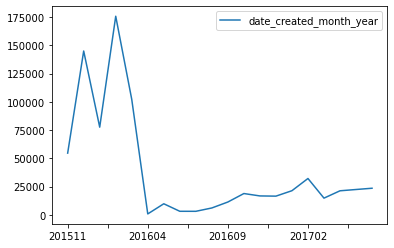

In [205]:
ts.plot()

##### Around 67381 new listings can be expected in the next 3 months

### 4.	How does uploading more photos impact the chance of a car getting sold? 

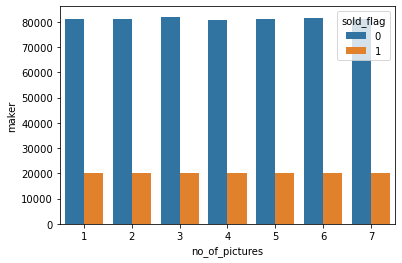

In [89]:
picture_df = combined_data.groupby(['no_of_pictures', 'sold_flag'])['maker'].count().to_frame().reset_index()
sns.barplot(x = 'no_of_pictures', y = 'maker', hue = 'sold_flag', data = picture_df)
plt.show()

##### No noticable difference in uploading 1 or even 7 photos

In [90]:
combined_data[combined_data['sold_flag'] != 1].groupby('maker')['no_of_pictures'].mean()

maker
0     3.998820
1     4.071521
2     5.250000
3     3.999673
4     4.189474
5     3.993666
6     4.044438
7     4.000000
8     3.999229
9     3.934579
10    3.935867
11    4.025704
12    3.993653
13    4.013308
14    3.896552
15    3.986900
16    4.095238
17    4.009174
18    3.980528
19    4.000000
20    3.986325
21    3.976190
22    4.022591
23    3.978571
24    4.048062
25    4.389610
26    4.033113
27    3.992810
28    4.013999
29    4.056350
30    3.966079
31    4.001923
32    4.014464
33    3.997553
34    4.014463
35    3.977179
36    3.375000
37    4.028267
38    3.999248
39    4.000775
40    4.020151
41    4.031269
42    4.024682
43    3.965517
44    3.991115
45    3.999520
46    4.001281
Name: no_of_pictures, dtype: float64

In [91]:
combined_data[combined_data['sold_flag'] == 1].groupby('maker')['no_of_pictures'].mean()

maker
0     4.004901
1     4.211957
2     3.000000
3     4.000605
4     3.840000
5     4.022736
6     4.034814
7     3.979827
8     3.987080
9     4.025974
10    4.279330
11    4.000755
12    3.950493
13    3.998153
14    4.281250
15    4.034504
16    4.300000
17    3.173913
18    3.973404
19    4.070465
20    3.940709
21    4.357143
22    3.981378
23    4.279412
24    4.031646
25    3.600000
26    4.144578
27    4.014415
28    3.986814
29    3.948148
30    4.082601
31    3.985889
32    3.989497
33    3.932949
34    4.019348
35    3.997213
36    7.000000
37    3.848086
38    3.960276
39    3.986254
40    3.956147
41    3.951338
42    4.075671
43    4.300000
44    3.982425
45    4.032447
46    3.931948
Name: no_of_pictures, dtype: float64

#### Except rolls-royce, there is no noticable difference between uploading photos and not

##  5.	As a quick win, can you create rule-sets using advertisement heuristics which could be applied to filter out Ads which are bad in quality?

1. manufacture_year < 1900
2. door_count > 7
3. seat_count > 12
4. price <= mean * 1.5
5. mileage <= mean * 1.5
6. no_of_pictures = 0
7. maker is NaN
8. fuel_type is NaN

In [126]:
filter_ads = combined_data_copy[(combined_data_copy['manufacture_year'] >= 1900) & (combined_data_copy['door_count'].astype(int) <= 7) & (combined_data_copy['seat_count'].astype(int) <= 12) & (combined_data_copy['no_of_pictures'] != 0) & (combined_data_copy['maker'].notnull()) & (combined_data_copy['fuel_type'].notnull()) & (combined_data_copy['mileage'] <= combined_data_copy['mileage'].mean() * 1.5) & (combined_data_copy['price_eur'] <= combined_data_copy['price_eur'].mean() * 1.5)]

In [127]:
filter_ads.shape

(483137, 22)

## 6. What are the top 3 features that you have created using the columns given in the data? What is your criteria of choosing Top 3 features?

In [ ]:
model = DecisionTreeClassifier()
model.fit(X, y)

In [ ]:
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature:', X.columns[i], 'Score:', round(v, 6))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Based on Decision tree model, we have identified these 3 as top features. Also by EDA we were able to identify the same
1. mileage
2. price_eur
3. manufacture_year   


## 7.	Create a Deep Learning Model (using architecture, platform & framework of your choice), to create a ranked list of advertisements in the current inventory which could help the company maximize their revenue.

## NN

In [373]:
model = Sequential()
model.add(Dense(50, input_dim=16 , activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(9, activation = 'sigmoid'))
model.add(Dense(2, activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [374]:
model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 3, verbose = 1)

Epoch 1/5
4276/4276 [==============================] - 12s 2ms/step - loss: 0.6936 - accuracy: 0.5018
Epoch 2/5
4276/4276 [==============================] - 9s 2ms/step - loss: 0.6933 - accuracy: 0.5026
Epoch 3/5
4276/4276 [==============================] - 10s 2ms/step - loss: 0.6931 - accuracy: 0.5029
Epoch 4/5
4276/4276 [==============================] - 10s 2ms/step - loss: 0.6930 - accuracy: 0.5041
Epoch 5/5
4276/4276 [==============================] - 10s 2ms/step - loss: 0.6930 - accuracy: 0.5045


#### Add weight initializer

In [376]:
model = Sequential()
model.add(Dense(50, input_dim = 16, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(9, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(2, activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [377]:
model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 3, verbose = 1)

Epoch 1/3
4276/4276 [==============================] - 11s 3ms/step - loss: 0.6935 - accuracy: 0.5002
Epoch 2/3
4276/4276 [==============================] - 12s 3ms/step - loss: 0.6932 - accuracy: 0.5026
Epoch 3/3
4276/4276 [==============================] - 13s 3ms/step - loss: 0.6930 - accuracy: 0.5045


### Change activation function

In [379]:
model = Sequential()
model.add(Dense(50, input_dim = 16, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(2, activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [380]:
model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 3, verbose = 1)

Epoch 1/3
4276/4276 [==============================] - 12s 3ms/step - loss: 0.6932 - accuracy: 0.5019
Epoch 2/3
4276/4276 [==============================] - 12s 3ms/step - loss: 0.6930 - accuracy: 0.5066
Epoch 3/3
4276/4276 [==============================] - 11s 3ms/step - loss: 0.6929 - accuracy: 0.5080


### Add batch normalization

In [383]:
model = Sequential()
model.add(Dense(50, input_dim = 16, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(9, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [384]:
model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 3, verbose = 1)

Epoch 1/3
4276/4276 [==============================] - 34s 8ms/step - loss: 0.7025 - accuracy: 0.5067
Epoch 2/3
4276/4276 [==============================] - 33s 8ms/step - loss: 0.6927 - accuracy: 0.5115
Epoch 3/3
4276/4276 [==============================] - 33s 8ms/step - loss: 0.6923 - accuracy: 0.5142


### Add Dropout

In [540]:
model = Sequential()
model.add(Dense(50, input_dim = 16, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(9, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [541]:
history = model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 50, verbose = 1, validation_data=(X_test, y_test_c))

Epoch 1/50
4276/4276 [==============================] - 30s 7ms/step - loss: 0.6993 - accuracy: 0.5013 - val_loss: 0.6987 - val_accuracy: 0.2590
Epoch 2/50
4276/4276 [==============================] - 27s 6ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.7039 - val_accuracy: 0.2111
Epoch 3/50
4276/4276 [==============================] - 27s 6ms/step - loss: 0.6927 - accuracy: 0.5101 - val_loss: 0.6963 - val_accuracy: 0.3353
Epoch 4/50
4276/4276 [==============================] - 30s 7ms/step - loss: 0.6922 - accuracy: 0.5165 - val_loss: 0.7072 - val_accuracy: 0.3160
Epoch 5/50
4276/4276 [==============================] - 32s 8ms/step - loss: 0.6916 - accuracy: 0.5219 - val_loss: 0.6954 - val_accuracy: 0.3966
Epoch 6/50
4276/4276 [==============================] - 33s 8ms/step - loss: 0.6909 - accuracy: 0.5270 - val_loss: 0.6989 - val_accuracy: 0.3995
Epoch 7/50
4276/4276 [==============================] - 34s 8ms/step - loss: 0.6902 - accuracy: 0.5304 - val_loss: 0.7048 - val_ac

In [542]:
predictions = np.argmax(model.predict(X_test),axis=1)

<AxesSubplot:>

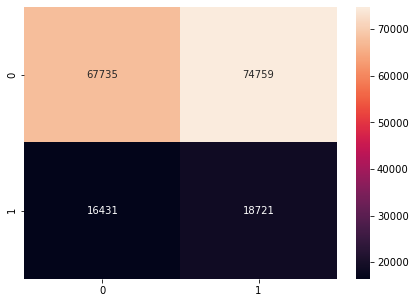

In [543]:
cm=confusion_matrix(y_test, predictions,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["0","1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## 8.	How did you measure the accuracy of your model? How did you identify that your model didn’t under/ over fit? Please share some visualizations and your interpretation/findings from the same.

In [544]:
precision, recall, fscore, support = score(y_test, predictions)

In [545]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.80477865 0.20026744]
recall: [0.47535335 0.53257283]
fscore: [0.59767934 0.29107843]
support: [142494  35152]


In [546]:
sold_probability = model.predict(X_test)

sold_out = []
for i in sold_probability:
    sold_out.append(i[1])

In [555]:
X_test_dataset['Rank'] = sold_out
X_test_dataset['Sold_flag'] = y_test
X_test_dataset['Predicted_flag'] = np.argmax(sold_probability, axis=-1)

In [508]:
# maker = LabelEncoder()
# combined_data['maker'] = maker.inverse_transform(combined_data['maker']) 
# model = LabelEncoder()
# combined_data['model'] = model.inverse_transform(combined_data['model']) 
# body_type = LabelEncoder()
# combined_data['body_type'] = body_type.inverse_transform(combined_data['body_type']) 
# transmission = LabelEncoder()
# combined_data['transmission'] = transmission.inverse_transform(combined_data['transmission']) 
# fuel_type = LabelEncoder()
# combined_data['fuel_type'] = fuel_type.inverse_transform(combined_data['fuel_type']) 

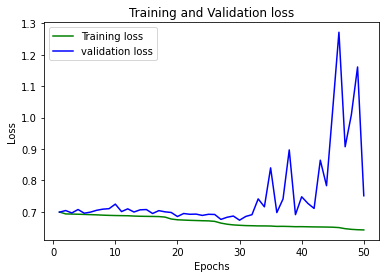

In [549]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

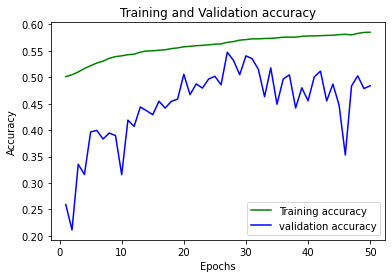

In [551]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 30 epochs seem to be appropriate

## 9.	Suppose, till now, the company was ranking the advertisements in a descending order on the basis of date_last_seen, so can you demonstrate the lift in performance of your model as compared to the current ranking criteria?

In [565]:
X_test_dataset = X_test_dataset.sort_values(by = 'Rank', ascending = False)

In [566]:
X_test_dataset

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur,height_of_picture,width_of_picture,aspect_ratio,no_of_pictures,Sold_flag,Rank,Predicted_flag
515294,32,600,5.0,0.0,1364.0,103.0,6,1,0,0,3,1295.34,60.0,468.0,7.8000,7,0,0.999908,1
547050,32,582,95450.0,2005.0,1598.0,74.0,4,1,0,0,3,1295.34,60.0,468.0,7.8000,7,0,0.999880,1
222577,0,166,0.0,1992.0,300.0,25.0,7,1,0,0,3,1295.34,42.0,125.0,2.9761,7,0,0.999818,1
4342,31,523,1.0,2016.0,1200.0,85.0,7,1,0,0,3,1295.34,60.0,468.0,7.8000,7,1,0.999692,1
295706,39,628,92018.0,2014.0,1395.0,81.0,4,1,0,0,3,1295.34,51.0,110.0,2.1020,7,0,0.999685,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237516,0,166,4500.0,1982.0,1598.0,98.0,5,1,4,5,3,11112344.67,51.0,110.0,2.1020,2,0,0.114254,0
322621,0,166,80700.0,0.0,1598.0,81.0,2,1,4,5,3,28722781.20,35.0,54.0,1.5428,3,0,0.103123,0
403812,11,101,64400.0,0.0,1248.0,59.0,2,1,5,5,3,26944857.51,45.0,100.0,2.2222,1,0,0.068305,0
93226,11,473,64400.0,0.0,1248.0,59.0,2,1,5,5,3,26771110.73,125.0,200.0,1.6000,6,0,0.067204,0


## 10.	Can you explain in a step-by-step manner, how you performed various iterations and what impact did it have on the model accuracy?

1. Read the data and update the missing values
2. Treat the outliers
3. Encoding the data
4. Split the data into train and test (Also val if required)
5. Scale the data
6. Since the dataset is imbalance, we need to upscale the data
7. Build Logistic regression model and with tuning we calcualte the accuracy
8. Also we build NN model step by step
    a. Add weight initializer and see if the accuracy increases
    b. Change activation function
    c. add Batch normalization
    d. Add drop out
9. Train for 50 epochs and plot for training loss and validation loss and see the graph
10. find optimum numbers of Epochs and retrain it.